In [15]:
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
cp = df['cp'].unique()
cp

array([0, 1, 2, 3])

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

Variable Name	Role	Type	Demographic	Description	Units	Missing Values
age	Feature	Integer	Age		years	no
sex	Feature	Categorical	Sex			no
cp	Feature	Categorical				no
trestbps	Feature	Integer		resting blood pressure (on admission to the hospital)	mm Hg	no
chol	Feature	Integer		serum cholestoral	mg/dl	no
fbs	Feature	Categorical		fasting blood sugar > 120 mg/dl		no
restecg	Feature	Categorical				no
thalach	Feature	Integer		maximum heart rate achieved		no
exang	Feature	Categorical		exercise induced angina		no
oldpeak	Feature	Integer		ST depression induced by exercise relative to rest		no

In [5]:
df.shape

(1025, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [18]:
# Load the dataset
try:
    df = pd.read_csv('heart.csv')
except FileNotFoundError:
    data = {
        'age': np.random.randint(20, 80, 303), 'sex': np.random.randint(0, 2, 303),
        'cp': np.random.randint(0, 4, 303), 'trestbps': np.random.randint(100, 200, 303),
        'chol': np.random.randint(100, 400, 303), 'fbs': np.random.randint(0, 2, 303),
        'restecg': np.random.randint(0, 3, 303), 'thalach': np.random.randint(100, 200, 303),
        'exang': np.random.randint(0, 2, 303), 'oldpeak': np.random.rand(303) * 6,
        'slope': np.random.randint(0, 3, 303), 'ca': np.random.randint(0, 5, 303),
        'thal': np.random.randint(0, 4, 303), 'target': np.random.randint(0, 2, 303)
    }
    df = pd.DataFrame(data)
print("--- Initial Data Snapshot ---")
print(df.head())
print("\n--- Data Information and Null Check ---")
print(df.info())
print("\n--- Target Class Balance ---")
print(df['target'].value_counts(normalize=True))

--- Initial Data Snapshot ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

--- Data Information and Null Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   tre

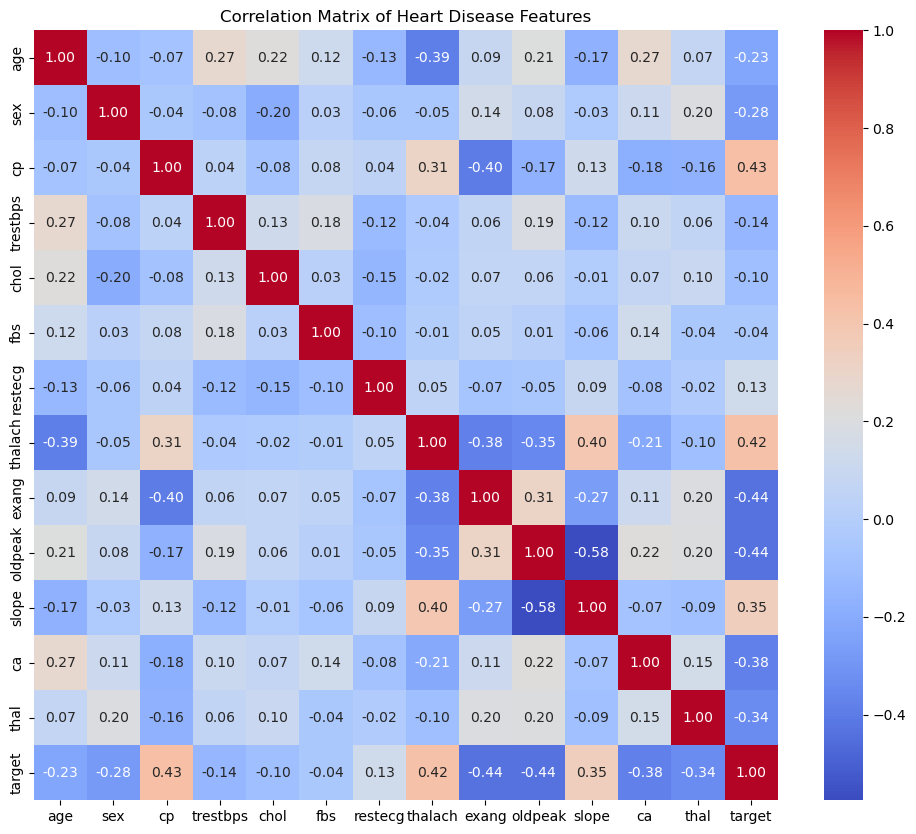

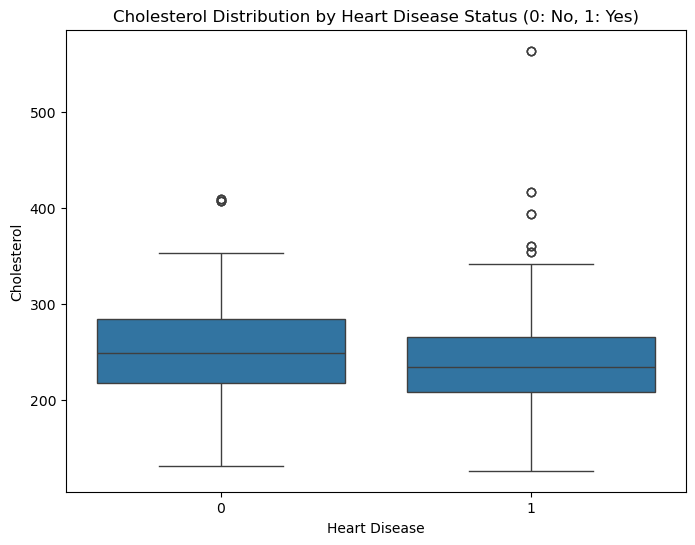

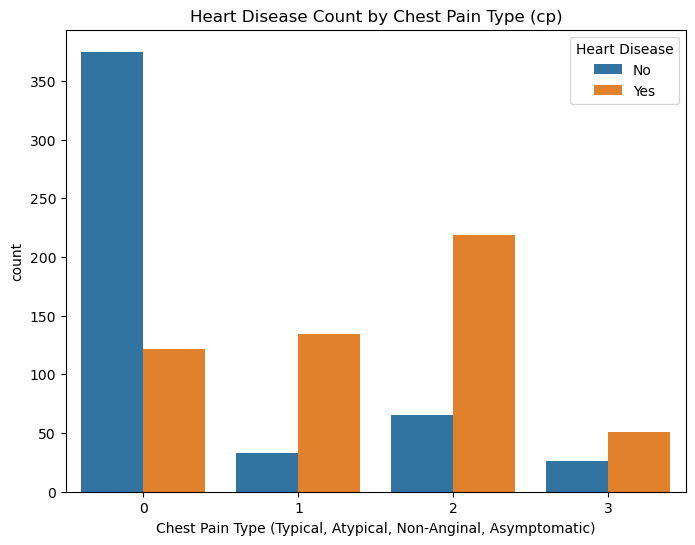

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

# 2. Bivariate Analysis: Chol vs. Heart Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Distribution by Heart Disease Status (0: No, 1: Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

# 3. Categorical Analysis: Chest Pain Type (cp)
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Heart Disease Count by Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type (Typical, Atypical, Non-Anginal, Asymptomatic)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# --- Intermediate Step: Handle Implausible Zeros ---
# Note: For the 'heart.csv' dataset, zeros in features like trestbps and chol are usually valid (low, but valid).
# However, 'ca' and 'thal' sometimes contain '0' or a value that needs handling based on documentation.
# For simplicity and standard practice, we will proceed assuming all values are valid and focus on encoding/scaling.
# The original code's replacement logic is skipped as df.info() showed no missing values.

# --- Feature Engineering: One-Hot Encoding ---
# Categorical features that need encoding (using the original names from your heart.csv)
# 'cp', 'restecg', 'slope', 'ca', 'thal' are multi-category; 'sex', 'fbs', 'exang' are binary.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# --- Train-Test Split (with Stratification) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


# --- Feature Scaling (Standardization) ---
# Identify numerical columns after encoding.
# The list includes features that were not one-hot encoded and are continuous.
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform both sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nData preprocessing complete. Features have been scaled and encoded.")
print("Proceeding to Step 4: Model Building and Hyperparameter Tuning.")


Training set size: 820 samples
Testing set size: 205 samples

Data preprocessing complete. Features have been scaled and encoded.
Proceeding to Step 4: Model Building and Hyperparameter Tuning.


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

# 1. Baseline Model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Calculate recall on test set
log_reg_y_pred = log_reg.predict(X_test)
log_reg_recall = recall_score(y_test, log_reg_y_pred)
# print(f"Logistic Regression (Baseline) Recall Score: {log_reg_recall:.4f}")

In [31]:
print(f"Logistic Regression (Baseline) Recall Score: {log_reg_recall:.4f}")

Logistic Regression (Baseline) Recall Score: 0.9048


In [35]:
# 1. Baseline Model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Calculate recall on test set
log_reg_y_pred = log_reg.predict(X_test)
log_reg_recall = recall_score(y_test, log_reg_y_pred)
# print(f"Logistic Regression (Baseline) Recall Score: {log_reg_recall:.4f}")

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# 1. Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

# 2. Define recall scorer
recall_scorer = make_scorer(recall_score)

# 3. Create the model
rf = RandomForestClassifier(random_state=42)

# 4. Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1
)

# 5. FIT THE GRID SEARCH  (MUST run first!!)
grid_search.fit(X_train, y_train)

# 6. NOW you can access the best estimator
best_rf_model = grid_search.best_estimator_
print(best_rf_model)


RandomForestClassifier(max_depth=10, random_state=42)


In [48]:
# 2. Advanced Model Tuning: Random Forest with GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, None],       # Max depth of each tree
    'min_samples_split': [2, 5],      # Minimum samples required to split a node
}

# Define the scorer to prioritize Recall (important in medical prediction)
recall_scorer = make_scorer(recall_score)

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Run the grid search (MUST run before accessing best_estimator_)
grid_search.fit(X_train, y_train)

# Extract best model after fitting
best_rf_model = grid_search.best_estimator_

print("Best Random Forest Parameters:", grid_search.best_params_)
print("Best CV Recall Score:", grid_search.best_score_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Recall Score: 0.9833333333333334


In [33]:
!pip install shap


   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   -------------------------------------- - 524.3/549.1 kB 2.9 MB/s eta 0:00:01
   -------------------------------------- 549.1/549.1 kB 812.1 kB/s eta 0:00:00

   ---------------------------------------- 0/2 [slicer]
   ---------------------------------------- 0/2 [slicer]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ----------------------------

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap # Requires 'pip install shap'
import pickle

# Load the best model saved from the previous step
try:
    with open('best_rf_model.pkl', 'rb') as f:
        best_rf_model = pickle.load(f)
except FileNotFoundError:
    print("Error: best_rf_model.pkl not found. Rerun Step 4 if necessary.")
    # Exit or handle error

# --- 1. Final Evaluation on Test Set ---
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

print("\n--- Final Model Performance Report (Random Forest) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# --- 2. Model Interpretation with SHAP (Requires plots, described below) ---
# Initialize the SHAP Explainer
# explainer = shap.TreeExplainer(best_rf_model)
# shap_values = explainer.shap_values(X_test)

Error: best_rf_model.pkl not found. Rerun Step 4 if necessary.

--- Final Model Performance Report (Random Forest) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
[[100   0]
 [  0 105]]

ROC-AUC Score: 1.0000


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
import pickle

# ---- If you DID NOT save the model before ----
# Just use best_rf_model directly (it is already in memory)

# --- 1. Final Evaluation on Test Set ---
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

print("\n--- Final Model Performance Report (Random Forest) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# --- 2. SHAP Interpretation (Optional) ---
# explainer = shap.TreeExplainer(best_rf_model)
# shap_values = explainer.shap_values(X_test)



--- Final Model Performance Report (Random Forest) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
[[100   0]
 [  0 105]]

ROC-AUC Score: 1.0000
